# adversell

In [8]:
print("hello , :D")

hello , :D


# Task I

In [9]:
# A) Load & combine both sheets into one DataFrame

import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)



### load the dataset


In [10]:
file_path = "dataset/online_retail_II.xlsx"  # adjust if needed

# Read all sheets at once (returns a dict: {sheet_name: df})
sheets = pd.read_excel(file_path, sheet_name=None)

# Add a column to remember which sheet each row came from, then stack
df_list = []
for name, d in sheets.items():
    d = d.copy()
    d["Period"] = name  # e.g., "Year 2009-2010", "Year 2010-2011"
    df_list.append(d)

df_raw = pd.concat(df_list, ignore_index=True)

In [11]:
print("Sheets loaded:", list(sheets.keys()))
print("Combined shape:", df_raw.shape)
df_raw.head()


Sheets loaded: ['Year 2009-2010', 'Year 2010-2011']
Combined shape: (1067371, 9)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Period
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,Year 2009-2010
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,Year 2009-2010
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,Year 2009-2010
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,Year 2009-2010
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,Year 2009-2010


In [12]:
# Save combined raw dataset to CSV
df_raw.to_csv("dataset/online_retail_combined_raw.csv", index=False)
print("✅ Combined raw dataset saved to dataset/online_retail_combined_raw.csv")


✅ Combined raw dataset saved to dataset/online_retail_combined_raw.csv


## preprocessing

In [13]:
# Step 4 - Preprocessing / Cleaning
df = df_raw.copy()


In [14]:
df.head

<bound method NDFrame.head of         Invoice StockCode                          Description  Quantity         InvoiceDate  Price  Customer ID         Country          Period
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  Year 2009-2010
1        489434    79323P                   PINK CHERRY LIGHTS        12 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  Year 2009-2010
2        489434    79323W                  WHITE CHERRY LIGHTS        12 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  Year 2009-2010
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  Year 2009-2010
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  Year 2009-2010
...         ...       ...                                  ...       ...                 ...    ... 

In [15]:

# --- 1️⃣ Handle missing values ---
# drop rows where essential info is missing
essential_cols = ["Invoice", "StockCode", "Description", "Quantity", "InvoiceDate", "Price"]
if "Customer ID" in df.columns:
    print("Customer ID Appended :D ")
    essential_cols.append("Customer ID")

df = df.dropna(subset=essential_cols)



Customer ID Appended :D 


In [16]:
df.info

<bound method DataFrame.info of         Invoice StockCode                          Description  Quantity         InvoiceDate  Price  Customer ID         Country          Period
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  Year 2009-2010
1        489434    79323P                   PINK CHERRY LIGHTS        12 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  Year 2009-2010
2        489434    79323W                  WHITE CHERRY LIGHTS        12 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  Year 2009-2010
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  Year 2009-2010
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  Year 2009-2010
...         ...       ...                                  ...       ...                 ...    ..

In [17]:
# --- 2️⃣ Remove duplicates ---
before_dups = df.shape[0]

# Remove exact duplicate rows (same invoice, product, customer, etc.)
# This does NOT remove multiple purchases of the same product by different customers.
df = df.drop_duplicates()

after_dups = df.shape[0]
print(f"Removed {before_dups - after_dups} duplicate rows.")



Removed 11996 duplicate rows.


In [19]:
# --- 3️⃣ Remove invalid / negative values ---
before_neg =  df.shape[0]
df = df[(df["Quantity"] > 0) & (df["Price"] > 0)]
after_dups_neg =  df.shape[0]
print(f"Removed {before_neg - after_dups_neg} neg rows.")


Removed 0 neg rows.


In [20]:
# --- 4️⃣ Remove returns (invoices starting with 'C') ---
df = df[~df["Invoice"].astype(str).str.startswith("C")]

# --- 5️⃣ Clean up text columns (strip spaces) ---
df["Description"] = df["Description"].astype(str).str.strip()
df["Country"] = df["Country"].astype(str).str.strip()

# --- 6️⃣ Add total price column ---
df["TotalPrice"] = df["Quantity"] * df["Price"]

# --- 7️⃣ Convert dates properly ---
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], errors="coerce")

# --- ✅ Final sanity check ---
print("After cleaning:")
print(f"Rows: {df.shape[0]}")
print(f"Unique products: {df['StockCode'].nunique()}")
print(f"Unique customers: {df['Customer ID'].nunique()}")
print(f"Date range: {df['InvoiceDate'].min()} → {df['InvoiceDate'].max()}")

# --- 8️⃣ Save cleaned dataset ---
df.to_csv("dataset/online_retail_clean.csv", index=False)
print("✅ Cleaned dataset saved to dataset/online_retail_clean.csv")

# Preview first few rows
df.head()

After cleaning:
Rows: 793609
Unique products: 4631
Unique customers: 5878
Date range: 2009-12-01 07:45:00 → 2011-12-09 12:50:00
✅ Cleaned dataset saved to dataset/online_retail_clean.csv


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Period,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,Year 2009-2010,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,Year 2009-2010,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,Year 2009-2010,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,Year 2009-2010,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,Year 2009-2010,30.0


# Task II

In [1]:
# Step 5 - Modeling Sellers, Demand, and Profit

import numpy as np
import pandas as pd

# --- constants ---
base_demand = 100     # basic demand level
alpha = 4             # effect of marketing
beta = -3             # effect of price difference (negative = higher price, lower demand)
gamma = 2             # social influence effect
cost = 5              # fixed production cost per unit

# social influence scores for sellers
influence_scores = {"A": 3, "B": 2, "C": 1}

# --- define demand function ---
def demand(p_i, p_j, m_i, influence_i):
    return base_demand + (alpha * m_i) + (beta * (p_i - p_j)) + (gamma * influence_i)

# --- define profit function ---
def profit(p_i, p_j, m_i, influence_i):
    D_i = demand(p_i, p_j, m_i, influence_i)
    return (p_i - cost) * D_i - m_i

# --- test example with two sellers ---
p_A, m_A = 12, 6
p_B, m_B = 10, 8

profit_A = profit(p_A, p_B, m_A, influence_scores["A"])
profit_B = profit(p_B, p_A, m_B, influence_scores["B"])

print(f"Profit A: {profit_A:.2f}")
print(f"Profit B: {profit_B:.2f}")


Profit A: 862.00
Profit B: 702.00


In [2]:
# Step 6 - Simulate strategy grid and find Nash equilibrium

# Define possible strategy ranges
price_range = np.arange(5, 16, 1)      # prices from 5 to 15
marketing_range = np.arange(0, 11, 2)  # ad budgets from 0 to 10

results = []

# compute profits for all combinations
for p_A in price_range:
    for m_A in marketing_range:
        for p_B in price_range:
            for m_B in marketing_range:
                profit_A = profit(p_A, p_B, m_A, influence_scores["A"])
                profit_B = profit(p_B, p_A, m_B, influence_scores["B"])
                results.append({
                    "p_A": p_A, "m_A": m_A,
                    "p_B": p_B, "m_B": m_B,
                    "profit_A": profit_A,
                    "profit_B": profit_B
                })

df_game = pd.DataFrame(results)

# Find best responses (max profit) for each seller given the other's actions
best_A = df_game.loc[df_game.groupby(["p_B", "m_B"])["profit_A"].idxmax()]
best_B = df_game.loc[df_game.groupby(["p_A", "m_A"])["profit_B"].idxmax()]

# Nash equilibrium = intersection of best responses
nash = pd.merge(best_A, best_B, on=["p_A", "m_A", "p_B", "m_B"])
print("Possible Nash Equilibrium(s):")
display(nash)


Possible Nash Equilibrium(s):


,p_A,m_A,p_B,m_B,profit_A_x,profit_B_x,profit_A_y,profit_B_y
0,15,10,15,10,1450,1430,1450,1430


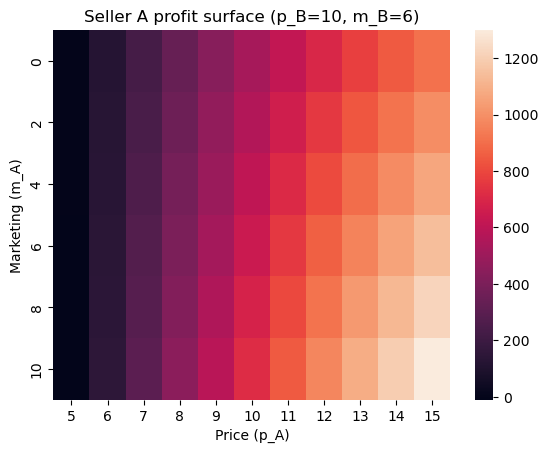

In [5]:
# pick a single opponent strategy
pB_fixed = 10
mB_fixed = 6   # choose any value in your marketing_range

subset = df_game[(df_game["p_B"] == pB_fixed) & (df_game["m_B"] == mB_fixed)]
pivot_A = subset.pivot(index="m_A", columns="p_A", values="profit_A")

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(pivot_A)
plt.title(f"Seller A profit surface (p_B={pB_fixed}, m_B={mB_fixed})")
plt.xlabel("Price (p_A)")
plt.ylabel("Marketing (m_A)")
plt.show()


# Task III

In [10]:
df_game

,p_A,m_A,p_B,m_B,profit_A,profit_B
0,5,0,5,0,0,0
1,5,0,5,2,0,-2
2,5,0,5,4,0,-4
3,5,0,5,6,0,-6
4,5,0,5,8,0,-8
...,...,...,...,...,...,...
4351,15,10,15,2,1450,1118
4352,15,10,15,4,1450,1196
4353,15,10,15,6,1450,1274
4354,15,10,15,8,1450,1352


In [9]:
import pandas as pd
import numpy as np

# ---------- CONFIG ----------
# Tie-breaking rule: pick the *lowest* p and lowest m among ties (change if you prefer)
def tiebreak(df, cols):
    df = df.sort_values(cols)  # ascending on both -> lowest price/ads among equals
    return df.iloc[0]

MAX_ITERS = 200
TOLERATE_STAY = 2     # need to see same profile this many consecutive iterations to declare convergence
REPORT_EVERY = 10

# ---------- BEST RESPONSES ----------
# Expect df_game columns: p_A, m_A, p_B, m_B, profit_A, profit_B
req_cols = {"p_A","m_A","p_B","m_B","profit_A","profit_B"}
missing = req_cols - set(df_game.columns)
if missing:
    raise ValueError(f"df_game is missing columns: {missing}")

def best_response_A(p_B, m_B):
    cand = df_game[(df_game["p_B"]==p_B) & (df_game["m_B"]==m_B)]
    if cand.empty:
        raise ValueError("No rows match opponent profile for A's best response.")
    best = cand[cand["profit_A"] == cand["profit_A"].max()]
    return tiebreak(best, ["p_A","m_A"])[["p_A","m_A","profit_A"]]

def best_response_B(p_A, m_A):
    cand = df_game[(df_game["p_A"]==p_A) & (df_game["m_A"]==m_A)]
    if cand.empty:
        raise ValueError("No rows match opponent profile for B's best response.")
    best = cand[cand["profit_B"] == cand["profit_B"].max()]
    return tiebreak(best, ["p_B","m_B"])[["p_B","m_B","profit_B"]]

# ---------- ITERATION (Cournot-like best-response dynamics) ----------
# Start from a sensible initial profile:
#  - lowest prices/ads in the grid (deterministic) to keep homework reproducible
pA0 = df_game["p_A"].min()
mA0 = df_game["m_A"].min()
pB0 = df_game["p_B"].min()
mB0 = df_game["m_B"].min()

trajectory = []
seen = {}
stable_count = 0

p_A, m_A, p_B, m_B = pA0, mA0, pB0, mB0

for t in range(1, MAX_ITERS+1):
    # A best-responds to B
    brA = best_response_A(p_B, m_B)
    p_A_new, m_A_new = brA["p_A"], brA["m_A"]

    # B best-responds to A (use A's *updated* action: sequential best responses)
    brB = best_response_B(p_A_new, m_A_new)
    p_B_new, m_B_new = brB["p_B"], brB["m_B"]

    # Read profits at the final profile this round
    row = df_game[(df_game["p_A"]==p_A_new) & (df_game["m_A"]==m_A_new) &
                  (df_game["p_B"]==p_B_new) & (df_game["m_B"]==m_B_new)]
    if row.empty:
        raise RuntimeError("Profile not found in df_game grid; check discretization.")
    profit_A = row.iloc[0]["profit_A"]
    profit_B = row.iloc[0]["profit_B"]

    profile = (int(p_A_new), int(m_A_new), int(p_B_new), int(m_B_new)) \
              if np.issubdtype(type(p_A_new), np.integer) else (p_A_new, m_A_new, p_B_new, m_B_new)

    trajectory.append({
        "iter": t,
        "p_A": p_A_new, "m_A": m_A_new, "profit_A": profit_A,
        "p_B": p_B_new, "m_B": m_B_new, "profit_B": profit_B
    })

    # Convergence check: if the profile didn't change vs previous, increase stable_count
    if t>1 and profile == (trajectory[-2]["p_A"], trajectory[-2]["m_A"],
                           trajectory[-2]["p_B"], trajectory[-2]["m_B"]):
        stable_count += 1
    else:
        stable_count = 0

    # Cycle detection
    seen[profile] = seen.get(profile, 0) + 1
    if seen[profile] > 1 and stable_count == 0:
        cycle_start = next(i for i, tr in enumerate(trajectory) if
                           (tr["p_A"], tr["m_A"], tr["p_B"], tr["m_B"]) == profile)
        print(f"⚠️ Cycle detected starting at iteration {cycle_start+1}. "
              f"Cycle length ≈ {t - (cycle_start+1) + 1}.")
        break

    # Stopping rules
    if stable_count >= TOLERATE_STAY:
        print(f"✅ Converged (Nash candidate) at iteration {t}.")
        break

    # Update for next round (not strictly needed since we used *_new everywhere)
    p_A, m_A, p_B, m_B = p_A_new, m_A_new, p_B_new, m_B_new

trajectory_df = pd.DataFrame(trajectory)
display(trajectory_df.tail(10))

# Final reported profile
last = trajectory_df.iloc[-1]
NE_profile = {
    "p_A": last["p_A"], "m_A": last["m_A"], "profit_A": last["profit_A"],
    "p_B": last["p_B"], "m_B": last["m_B"], "profit_B": last["profit_B"]
}
print("\n=== Task III Result (Iterative Best Responses) ===")
for k, v in NE_profile.items():
    print(f"{k}: {v}")

# Optional: save the path for your report
out_path = "taskIII_best_response_path.csv"
trajectory_df.to_csv(out_path, index=False)
print(f"\nSaved trajectory to {out_path}")


✅ Converged (Nash candidate) at iteration 3.


,iter,p_A,m_A,profit_A,p_B,m_B,profit_B
0,1,15,10,1450,15,10,1430
1,2,15,10,1450,15,10,1430
2,3,15,10,1450,15,10,1430



=== Task III Result (Iterative Best Responses) ===
p_A: 15
m_A: 10
profit_A: 1450
p_B: 15
m_B: 10
profit_B: 1430

Saved trajectory to taskIII_best_response_path.csv
